In [1]:
%%capture
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

!mv -v cats_and_dogs_filtered/train/dogs/* cats_and_dogs_filtered/train/
!mv -v cats_and_dogs_filtered/train/cats/* cats_and_dogs_filtered/train/
!rm -rf cats_and_dogs_filtered/train/cats/
!rm -rf cats_and_dogs_filtered/train/dogs/

!mv -v cats_and_dogs_filtered/validation/dogs/* cats_and_dogs_filtered/validation/
!mv -v cats_and_dogs_filtered/validation/cats/* cats_and_dogs_filtered/validation/
!rm -rf cats_and_dogs_filtered/validation/cats/
!rm -rf cats_and_dogs_filtered/validation/dogs/

!mkdir best_models

In [ ]:
%load_ext autoreload
%autoreload 2

PATH_REPO_DRIVE = 'drive/MyDrive/colab/entretien/cat-vs-dog'

#--Colab--------
import os, sys
try:
    import google.colab
    IN_COLAB = True
    import os
except:
    IN_COLAB = False

if IN_COLAB and os.getcwd()=='/content':
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(PATH_REPO_DRIVE)
#---------------

In [187]:
from dataset.cat_dog_dataset import CatDogDataloader, plot_images
from torchvision import transforms
from utils.trainer import Trainer
from model.resnet import ResNet18, ResNet34, ResNet50
from torchsummary import summary
import matplotlib.pyplot as plt

import torch
from torch import nn

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [131]:
custom_transform = transforms.Compose(
    [
        transforms.RandomPerspective(distortion_scale=.4, p=.5),
        transforms.Resize((400, 400)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(p=.5),
        transforms.RandomRotation(15),
        
        # added
        transforms.ColorJitter(
            brightness=0.4,
            contrast=0.4,
            saturation=0.4,
            hue=0.2
        ),

        transforms.ToTensor(),
        transforms.Normalize(mean=(0,0,0), std=(1,1,1))
    ]
)


dataloader = CatDogDataloader(
    img_size=224,
    batch_size=16,
    dataset_root = 'cats_and_dogs_filtered',
    custom_transform = custom_transform
)

In [188]:
images, _ = iter(dataloader.train_iterator).next()
plot_images(images, 'cat & dog - train', PATH_REPO_DRIVE)

images, _ = iter(dataloader.valid_iterator).next()
plot_images(images, 'cat & dog - valid')

images, _ = iter(dataloader.test_iterator).next()
plot_images(images, 'cat & dog - test', PATH_REPO_DRIVE)

Output hidden; open in https://colab.research.google.com to view.

In [180]:
class Classifier(ResNet18):
    def __init__(self, num_classes=1):
        super(Classifier, self).__init__(num_classes=num_classes)
        
        self.fc = nn.Sequential(
            nn.Linear(512*self.block.expansion, num_classes, bias=True),
            nn.Sigmoid()
        )

net = Classifier(num_classes=1)

In [181]:
net.summary(device, input_dim=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
    ResidualBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [182]:
trainer = Trainer(
    net,
    dataloader=dataloader,
    lr=0.0001,
    device=device,
    root=''
)

In [183]:
trainer.train_data(num_epochs=100)

Epoch: 0


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6983 Acc : 55.9181 Time: 22.2701
Valid - Loss : 0.6964 Acc : 57.2115 Time: 1.1330

Epoch: 1


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6984 Acc : 55.1991 Time: 22.2096
Valid - Loss : 0.6862 Acc : 55.7692 Time: 1.1522

Epoch: 2


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6846 Acc : 57.2456 Time: 23.6623
Valid - Loss : 0.6653 Acc : 61.5385 Time: 1.1571

Epoch: 3


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6834 Acc : 57.6327 Time: 22.4930
Valid - Loss : 0.6616 Acc : 59.1346 Time: 1.1114

Epoch: 4


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6793 Acc : 55.4204 Time: 22.9416
Valid - Loss : 0.6627 Acc : 65.8654 Time: 1.1296

Epoch: 5


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6685 Acc : 59.7345 Time: 22.9126
Valid - Loss : 0.6422 Acc : 62.9808 Time: 1.1245

Epoch: 6


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6779 Acc : 57.3562 Time: 22.3738
Valid - Loss : 0.6915 Acc : 57.2115 Time: 1.1692

Epoch: 7


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6657 Acc : 59.8451 Time: 22.5427
Valid - Loss : 0.6579 Acc : 62.5000 Time: 1.1334

Epoch: 8


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6624 Acc : 61.0619 Time: 22.7081
Valid - Loss : 0.6721 Acc : 60.0962 Time: 1.1393

Epoch: 9


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6595 Acc : 60.7854 Time: 23.8263
Valid - Loss : 0.6495 Acc : 62.5000 Time: 1.1384

Epoch: 10


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6574 Acc : 61.0066 Time: 22.5406
Valid - Loss : 0.6362 Acc : 62.9808 Time: 1.1374

Epoch: 11


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6562 Acc : 60.1770 Time: 22.2266
Valid - Loss : 0.6116 Acc : 67.3077 Time: 1.1478

Epoch: 12


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6435 Acc : 62.8319 Time: 22.5596
Valid - Loss : 0.5873 Acc : 66.8269 Time: 1.1524

Epoch: 13


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6449 Acc : 63.2190 Time: 22.5062
Valid - Loss : 0.5876 Acc : 68.7500 Time: 1.1353

Epoch: 14


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6352 Acc : 66.0398 Time: 22.6813
Valid - Loss : 0.6207 Acc : 68.7500 Time: 1.1123

Epoch: 15


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6158 Acc : 67.0354 Time: 23.8766
Valid - Loss : 0.5727 Acc : 66.8269 Time: 1.1449

Epoch: 16


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6292 Acc : 65.5973 Time: 22.5662
Valid - Loss : 0.5578 Acc : 71.6346 Time: 1.1078

Epoch: 17


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6151 Acc : 65.7633 Time: 22.7811
Valid - Loss : 0.5750 Acc : 70.6731 Time: 1.1439

Epoch: 18


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6112 Acc : 66.0951 Time: 22.3595
Valid - Loss : 0.5604 Acc : 74.0385 Time: 1.1380

Epoch: 19


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6124 Acc : 65.9845 Time: 22.4682
Valid - Loss : 0.5492 Acc : 71.6346 Time: 1.1299

Epoch: 20


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5998 Acc : 67.9757 Time: 22.5880
Valid - Loss : 0.5397 Acc : 75.9615 Time: 1.1738

Epoch: 21


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5945 Acc : 68.7500 Time: 22.3085
Valid - Loss : 0.5152 Acc : 75.0000 Time: 1.1245

Epoch: 22


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5885 Acc : 68.0863 Time: 23.9903
Valid - Loss : 0.5482 Acc : 72.5962 Time: 1.1187

Epoch: 23


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5964 Acc : 67.6991 Time: 22.4461
Valid - Loss : 0.5172 Acc : 77.8846 Time: 1.1153

Epoch: 24


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5968 Acc : 69.6350 Time: 22.5114
Valid - Loss : 0.5381 Acc : 75.0000 Time: 1.1175

Epoch: 25


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5841 Acc : 68.5288 Time: 22.4816
Valid - Loss : 0.5129 Acc : 76.9231 Time: 1.1316

Epoch: 26


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5762 Acc : 69.9115 Time: 22.3959
Valid - Loss : 0.5470 Acc : 71.1538 Time: 1.1238

Epoch: 27


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5694 Acc : 69.6903 Time: 22.2316
Valid - Loss : 0.5154 Acc : 76.9231 Time: 1.1243

Epoch: 28


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5524 Acc : 72.5111 Time: 23.7052
Valid - Loss : 0.5418 Acc : 70.1923 Time: 1.1148

Epoch: 29


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5555 Acc : 71.4602 Time: 22.4917
Valid - Loss : 0.5272 Acc : 75.4808 Time: 1.1257

Epoch: 30


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5626 Acc : 71.7920 Time: 21.8321
Valid - Loss : 0.5449 Acc : 72.5962 Time: 1.1019

Epoch: 31


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5301 Acc : 73.5066 Time: 22.3784
Valid - Loss : 0.4852 Acc : 78.3654 Time: 1.1159

Epoch: 32


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5444 Acc : 73.1195 Time: 22.2503
Valid - Loss : 0.5134 Acc : 72.1154 Time: 1.1293

Epoch: 33


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5292 Acc : 73.5066 Time: 22.3388
Valid - Loss : 0.4855 Acc : 77.8846 Time: 1.1335

Epoch: 34


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5227 Acc : 74.1150 Time: 22.8906
Valid - Loss : 0.4399 Acc : 78.8462 Time: 1.1237

Epoch: 35


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5133 Acc : 74.8341 Time: 23.7518
Valid - Loss : 0.4344 Acc : 80.2885 Time: 1.1525

Epoch: 36


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5149 Acc : 75.5531 Time: 22.5956
Valid - Loss : 0.4651 Acc : 80.2885 Time: 1.1128

Epoch: 37


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4971 Acc : 75.7743 Time: 22.1505
Valid - Loss : 0.4553 Acc : 80.2885 Time: 1.1373

Epoch: 38


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5056 Acc : 76.2721 Time: 22.2896
Valid - Loss : 0.4735 Acc : 76.4423 Time: 1.1199

Epoch: 39


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5049 Acc : 75.1659 Time: 22.3520
Valid - Loss : 0.4461 Acc : 80.7692 Time: 1.1496

Epoch: 40


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5010 Acc : 75.9403 Time: 22.2990
Valid - Loss : 0.4584 Acc : 76.4423 Time: 1.1575

Epoch: 41


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4887 Acc : 75.7190 Time: 23.4335
Valid - Loss : 0.4678 Acc : 79.3269 Time: 1.0885

Epoch: 42


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4991 Acc : 75.8296 Time: 22.6334
Valid - Loss : 0.4936 Acc : 76.9231 Time: 1.1014

Epoch: 43


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4669 Acc : 77.6549 Time: 22.1323
Valid - Loss : 0.5353 Acc : 74.0385 Time: 1.1046

Epoch: 44


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4842 Acc : 76.1615 Time: 22.3366
Valid - Loss : 0.4179 Acc : 83.6538 Time: 1.0994

Epoch: 45


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4732 Acc : 77.3230 Time: 22.1745
Valid - Loss : 0.4473 Acc : 78.8462 Time: 1.1235

Epoch: 46


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4736 Acc : 76.4934 Time: 22.4335
Valid - Loss : 0.4664 Acc : 75.9615 Time: 1.1028

Epoch: 47


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4757 Acc : 77.2677 Time: 22.4657
Valid - Loss : 0.4934 Acc : 75.4808 Time: 1.1204

Epoch: 48


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4567 Acc : 78.7058 Time: 23.8563
Valid - Loss : 0.4442 Acc : 79.8077 Time: 1.1364

Epoch: 49


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4679 Acc : 77.5442 Time: 22.5306
Valid - Loss : 0.4638 Acc : 80.7692 Time: 1.1161

Epoch: 50


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4531 Acc : 79.0929 Time: 22.2719
Valid - Loss : 0.4051 Acc : 81.2500 Time: 1.1040

Epoch: 51


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4479 Acc : 80.1991 Time: 22.4478
Valid - Loss : 0.4546 Acc : 78.3654 Time: 1.1218

Epoch: 52


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4354 Acc : 79.2035 Time: 22.6836
Valid - Loss : 0.4481 Acc : 76.4423 Time: 1.1333

Epoch: 53


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4330 Acc : 79.6460 Time: 22.3088
Valid - Loss : 0.4216 Acc : 82.2115 Time: 1.1154

Epoch: 54


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4440 Acc : 80.1438 Time: 22.4299
Valid - Loss : 0.4319 Acc : 79.3269 Time: 1.1118

Epoch: 55


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4321 Acc : 80.0332 Time: 23.7398
Valid - Loss : 0.3934 Acc : 84.1346 Time: 1.1570

Epoch: 56


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4428 Acc : 79.7013 Time: 22.4381
Valid - Loss : 0.3721 Acc : 84.1346 Time: 1.1401

Epoch: 57


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4195 Acc : 79.9779 Time: 22.5150
Valid - Loss : 0.4096 Acc : 81.2500 Time: 1.1281

Epoch: 58


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4237 Acc : 80.6969 Time: 22.1081
Valid - Loss : 0.3938 Acc : 79.8077 Time: 1.1278

Epoch: 59


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4044 Acc : 81.4712 Time: 22.7099
Valid - Loss : 0.4276 Acc : 81.7308 Time: 1.1410

Epoch: 60


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3997 Acc : 81.0841 Time: 22.4166
Valid - Loss : 0.4243 Acc : 82.2115 Time: 1.1500

Epoch: 61


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4175 Acc : 80.9181 Time: 23.5976
Valid - Loss : 0.4269 Acc : 81.2500 Time: 1.1187

Epoch: 62


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3907 Acc : 83.5177 Time: 22.3907
Valid - Loss : 0.3295 Acc : 87.5000 Time: 1.1208

Epoch: 63


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3923 Acc : 82.4115 Time: 22.5906
Valid - Loss : 0.3769 Acc : 85.0962 Time: 1.1034

Epoch: 64


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4077 Acc : 81.3053 Time: 22.3014
Valid - Loss : 0.3656 Acc : 82.6923 Time: 1.1239

Epoch: 65


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4087 Acc : 81.6372 Time: 22.3075
Valid - Loss : 0.3665 Acc : 83.1731 Time: 1.1314

Epoch: 66


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3947 Acc : 81.4159 Time: 22.6614
Valid - Loss : 0.3611 Acc : 82.6923 Time: 1.1355

Epoch: 67


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3876 Acc : 81.9690 Time: 23.7170
Valid - Loss : 0.3740 Acc : 84.6154 Time: 1.1143

Epoch: 68


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3831 Acc : 82.6881 Time: 22.0634
Valid - Loss : 0.3218 Acc : 88.4615 Time: 1.1422

Epoch: 69


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3744 Acc : 82.6327 Time: 22.3833
Valid - Loss : 0.3785 Acc : 80.7692 Time: 1.1377

Epoch: 70


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3782 Acc : 82.2456 Time: 22.4862
Valid - Loss : 0.3544 Acc : 88.4615 Time: 1.1295

Epoch: 71


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3873 Acc : 82.3009 Time: 22.6822
Valid - Loss : 0.3481 Acc : 85.0962 Time: 1.1185

Epoch: 72


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3966 Acc : 81.8584 Time: 22.4131
Valid - Loss : 0.3576 Acc : 81.2500 Time: 1.1175

Epoch: 73


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3492 Acc : 84.7345 Time: 22.3782
Valid - Loss : 0.3177 Acc : 85.5769 Time: 1.1443

Epoch: 74


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3831 Acc : 83.0752 Time: 23.8107
Valid - Loss : 0.3403 Acc : 85.5769 Time: 1.1231

Epoch: 75


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3681 Acc : 83.5730 Time: 22.2981
Valid - Loss : 0.3995 Acc : 83.6538 Time: 1.1291

Epoch: 76


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3617 Acc : 83.2412 Time: 22.1716
Valid - Loss : 0.3362 Acc : 86.0577 Time: 1.1194

Epoch: 77


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3378 Acc : 85.0111 Time: 22.1429
Valid - Loss : 0.3613 Acc : 83.6538 Time: 1.1693

Epoch: 78


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3338 Acc : 85.5642 Time: 22.5410
Valid - Loss : 0.3264 Acc : 83.6538 Time: 1.1367

Epoch: 79


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3536 Acc : 83.5177 Time: 22.4458
Valid - Loss : 0.3447 Acc : 85.0962 Time: 1.1439

Epoch: 80


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3622 Acc : 83.2965 Time: 22.9836
Valid - Loss : 0.3070 Acc : 87.5000 Time: 1.7127

Epoch: 81


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3440 Acc : 85.4535 Time: 22.7261
Valid - Loss : 0.3809 Acc : 82.2115 Time: 1.1416

Epoch: 82


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3440 Acc : 84.1261 Time: 22.1363
Valid - Loss : 0.2917 Acc : 86.0577 Time: 1.1329

Epoch: 83


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3279 Acc : 85.2876 Time: 22.2828
Valid - Loss : 0.3408 Acc : 85.5769 Time: 1.1076

Epoch: 84


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3399 Acc : 84.9004 Time: 22.2354
Valid - Loss : 0.3345 Acc : 86.0577 Time: 1.1166

Epoch: 85


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3404 Acc : 84.4580 Time: 22.6573
Valid - Loss : 0.3308 Acc : 83.1731 Time: 1.1169

Epoch: 86


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3302 Acc : 85.1770 Time: 22.2923
Valid - Loss : 0.3990 Acc : 79.3269 Time: 1.1306

Epoch: 87


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3292 Acc : 85.5642 Time: 23.4760
Valid - Loss : 0.2753 Acc : 89.4231 Time: 1.1223

Epoch: 88


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3219 Acc : 85.2323 Time: 22.2637
Valid - Loss : 0.3439 Acc : 83.6538 Time: 1.1090

Epoch: 89


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3366 Acc : 84.9004 Time: 22.3011
Valid - Loss : 0.2952 Acc : 84.1346 Time: 1.1310

Epoch: 90


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3253 Acc : 85.2876 Time: 22.5125
Valid - Loss : 0.3493 Acc : 85.5769 Time: 1.1243

Epoch: 91


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3300 Acc : 85.9513 Time: 22.2105
Valid - Loss : 0.3340 Acc : 85.5769 Time: 1.1327

Epoch: 92


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3193 Acc : 85.5088 Time: 22.3903
Valid - Loss : 0.3074 Acc : 83.1731 Time: 1.1305

Epoch: 93


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3017 Acc : 86.2279 Time: 22.2492
Valid - Loss : 0.3191 Acc : 85.5769 Time: 1.4423

Epoch: 94


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3064 Acc : 86.8916 Time: 23.0001
Valid - Loss : 0.2940 Acc : 85.5769 Time: 1.1397

Epoch: 95


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2975 Acc : 87.2235 Time: 22.1941
Valid - Loss : 0.3016 Acc : 85.0962 Time: 1.0982

Epoch: 96


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3349 Acc : 85.8960 Time: 22.6428
Valid - Loss : 0.2901 Acc : 86.0577 Time: 1.1296

Epoch: 97


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3133 Acc : 85.6748 Time: 22.1646
Valid - Loss : 0.2980 Acc : 87.0192 Time: 1.1188

Epoch: 98


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3090 Acc : 86.2279 Time: 22.0700
Valid - Loss : 0.3097 Acc : 85.0962 Time: 1.1093

Epoch: 99


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3066 Acc : 86.6704 Time: 22.0933
Valid - Loss : 0.2637 Acc : 87.9808 Time: 1.1027

Test  - Loss : 0.3143 Acc : 86.6071 Time: 4.5542


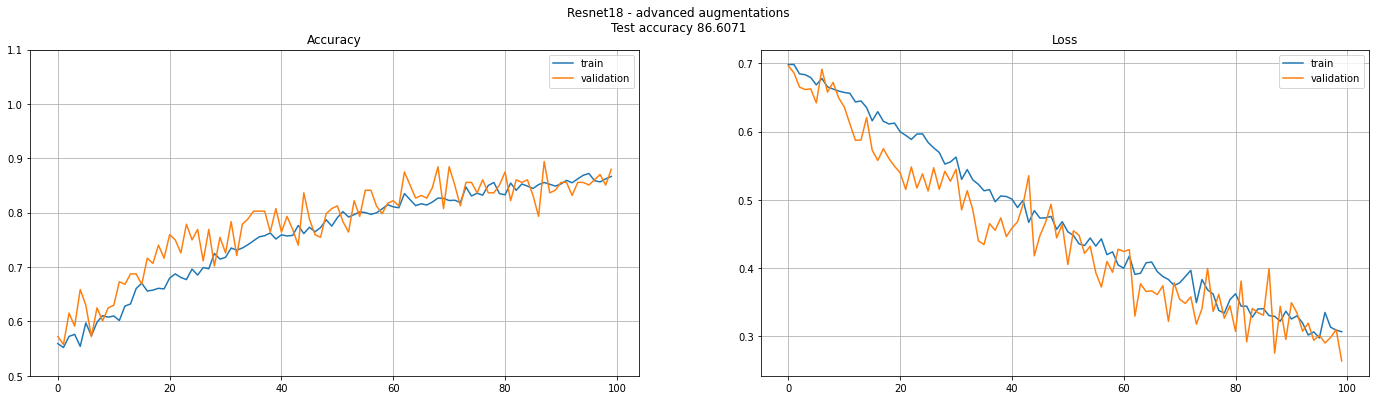

In [184]:
title = 'Resnet18 - advanced augmentations'
path_to_save = PATH_REPO_DRIVE #None

trainer.plot_history(title, path_to_save);